In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('Cw96.xlsx')
data['błąd'] = data['błąd'] + data.loc[0:12,'p_tla[muS/h]'].std(ddof=1)
data['srednia'] = data['srednia'] - data.loc[0:12,'p_tla[muS/h]'].mean()
data['sredniep'] = data['sredniep'] - data.loc[0:12,'p_tla[muS/h]'].mean()
print(data)

    linijka_cm  rzecz cm  pom1  pom2  pom3  pom4  pom5   srednia      błąd  \
0           15       NaN  0.24  0.19  0.22  0.25  0.25  0.121818  0.063884   
1           14       NaN  0.22  0.17  0.24  0.28  0.27  0.127818  0.080374   
2           13       NaN  0.31  0.34  0.31  0.26  0.26  0.187818  0.072449   
3           12       NaN  0.34  0.33  0.35  0.32  0.28  0.215818  0.065247   
4           11       NaN  0.23  0.25  0.33  0.29  0.27  0.165818  0.075490   
5           10       NaN  0.31  0.48  0.50  0.30  0.27  0.263818  0.138528   
6            9       NaN  0.35  0.30  0.30  0.29  0.28  0.195818  0.065247   
7            8       NaN  0.35  0.40  0.40  0.34  0.38  0.265818  0.066060   
8            7       NaN  0.46  0.58  0.51  0.47  0.39  0.373818  0.103498   
9            6       NaN  0.68  0.58  0.50  0.64  0.61  0.493818  0.101875   
10           5       NaN  0.75  0.67  0.72  0.55  0.81  0.591818  0.128716   
11           4       NaN  0.81  0.68  0.78  0.69  0.78  0.639818

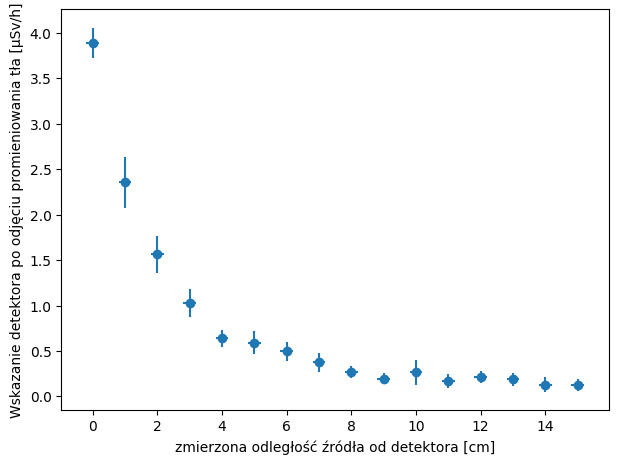

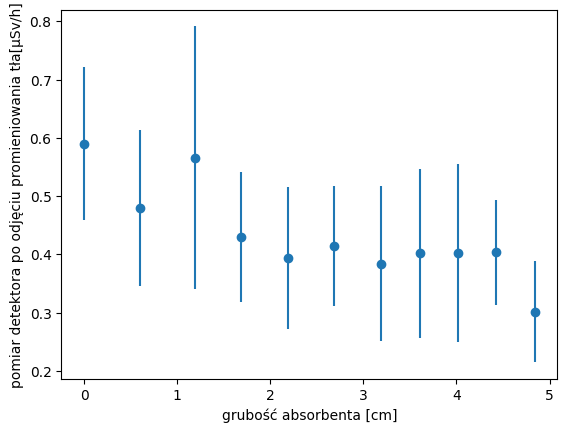

In [70]:
plt.xlabel('zmierzona odległość źródła od detektora [cm]')
plt.ylabel(u'Wskazanie detektora po odjęciu promieniowania tła [\u03BCSv/h]')
plt.tight_layout()
plt.scatter(data.loc[:,'linijka_cm'],data.loc[:,'srednia'])
plt.errorbar(data.loc[:,'linijka_cm'],data.loc[:,'srednia'],xerr= 0.2,yerr=data.loc[:,'błąd'],ls = 'none')
plt.figure()
x = [0] +  list(data.loc[:9,'grubosc_abs']* 10**-1) 
y = np.array( [0.7-0.11] + list(data.loc[:9,'sredniep']))
logy = np.log(y)
bladx = 0.0024
yerr = np.array([0.09 + data.loc[0:12,'p_tla[muS/h]'].std(ddof=1)] + list(data.loc[:9,'bladp'] + data.loc[0:12,'p_tla[muS/h]'].std(ddof=1)))
plt.errorbar(x,y,yerr,bladx,ls='none')
plt.scatter(x,y)
plt.xlabel('grubość absorbenta [cm]')
plt.ylabel(u'pomiar detektora po odjęciu promieniowania tła[\u03BCSv/h]')
plt.show()

Rysunki z danych

(array([40.27940417,  3.20325559]), array([[3.98636371, 0.17550775],
       [0.17550775, 0.00815322]]))


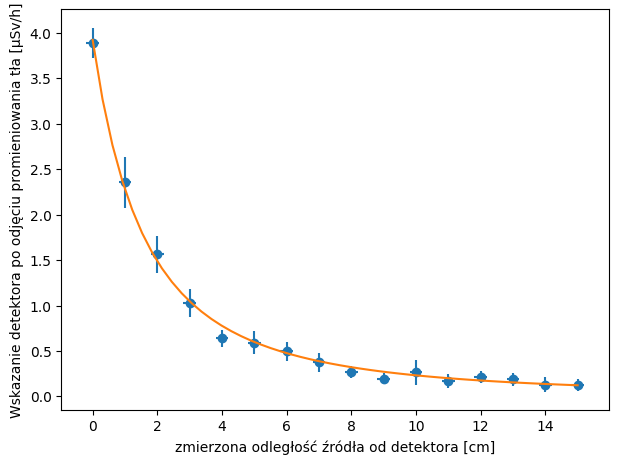

In [71]:
plt.xlabel('zmierzona odległość źródła od detektora [cm]')
plt.ylabel(u'Wskazanie detektora po odjęciu promieniowania tła [\u03BCSv/h]')
plt.tight_layout()
plt.scatter(data.loc[:,'linijka_cm'],data.loc[:,'srednia'])
plt.errorbar(data.loc[:,'linijka_cm'],data.loc[:,'srednia'],xerr= 0.2,yerr=data.loc[:,'błąd'],ls = 'none')


from scipy.optimize import curve_fit

def curve(x,a,b):
    return(a/((x+b)**2))

results = curve_fit(curve,data.loc[:,'linijka_cm'],data.loc[:,'srednia'],method='lm')
print(results)

new_x = np.linspace(0,15)
newy = curve(new_x,results[0][0],results[0][1])
plt.plot(new_x,newy)

plt.show()

absorbcja liniowa


LinregressResult(slope=-0.0995545525700891, intercept=-0.5951088233168917, rvalue=-0.8526669829660537, pvalue=0.0008521978483327161, stderr=0.02033335980389304, intercept_stderr=0.060973109497536614) 0.551502546265764


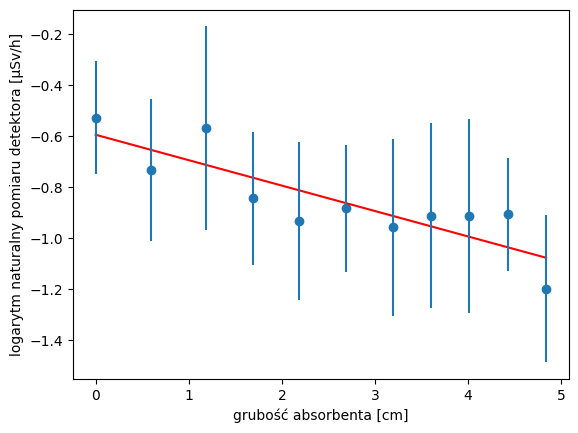

In [72]:
from scipy.stats import linregress
import math

x = [0] +  list(data.loc[:9,'grubosc_abs'] *10**-1)
y = np.array( [0.7-0.11] + list(data.loc[:9,'sredniep']))
logy = np.log(y)
bladx = 0.0024
blady = np.array([0.09 + data.loc[0:12,'p_tla[muS/h]'].std(ddof=1)] + list(data.loc[:9,'bladp'] + data.loc[0:12,'p_tla[muS/h]'].std(ddof=1)))/y
results = linregress(x,logy)
print(results,math.e**results.intercept)
plt.plot(x,results.slope*np.array(x) + results.intercept,c='r')
plt.scatter(x,logy)
plt.errorbar(x,logy,blady,bladx,ls='none')
plt.xlabel('grubość absorbenta [cm]')
plt.ylabel(u'logarytm naturalny pomiaru detektora [\u03BCSv/h]')
plt.show()